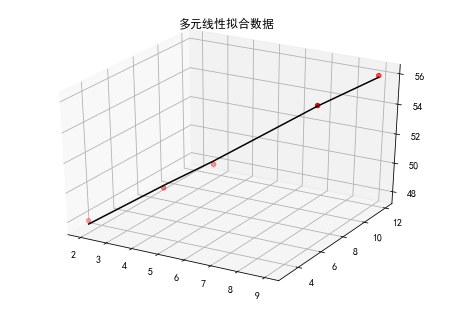

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import mpl
import math
import matplotlib.pyplot as plt
"""多元线性拟合
其中拟合数据为x1=2, 4, 5, 8, 9
             x2=3, 5, 7, 9, 12
             y=48, 50, 51, 55, 56
"""
x1 = [2, 4, 5, 8, 9]
x2 = [3, 5, 7, 9, 12]
y = [48, 50, 51, 55, 56]
 
"""完成拟合曲线参数计算前相应变量的计算"""
def multivariatel_liner_fitting(data_x1,data_x2,data_y):
    size = len(data_x1)
    sum_x1 = 0
    sum_x2 = 0
    sum_square_x1 = 0
    sum_square_x2 = 0
    sum_x1x2 = 0
    sum_y = 0
    sum_x1y = 0
    sum_x2y = 0
    i = 0
    while i < size:
        sum_x1 += data_x1[i]
        sum_x2 += data_x2[i]
        sum_y += data_y[i]
        sum_x1y += data_x1[i]*data_y[i]
        sum_x2y += data_x2[i]*data_y[i]
        sum_x1x2 += data_x1[i]*data_x2[i]
        sum_square_x1 += data_x1[i]*data_x1[i]
        sum_square_x2 += data_x2[i]*data_x2[i]
        i += 1
    return [[size, sum_x1, sum_x2, sum_y]
        ,[sum_x1, sum_square_x1, sum_x1x2, sum_x1y]
        ,[sum_x2, sum_x1x2, sum_square_x2,sum_x2y]]
 
 
"""利用高斯消元法，求解拟合曲线的参数"""
def calculate_parameter(data):
    #i用来控制列元素，line是一行元素,j用来控制循环次数,datas用来存储局部变量。保存修改后的值
    i = 0;
    j = 0;
    line_size = len(data)
 
   #将行列式变换为上三角行列式
    while j < line_size-1:
        line = data[j]
        temp = line[j]
        templete=[]
        for x in line:
            x=x/temp
            templete.append(x)
        data[j]=templete
        #flag标志应该进行消元的行数
        flag = j+1
        while flag < line_size:
            templete1 = []
            temp1=data[flag][j]
            i = 0
            for x1 in data[flag]:
                if x1!=0:
                   x1 = x1-(temp1*templete[i])
                   templete1.append(x1)
                else:
                   templete1.append(0)
                i += 1
            data[flag] = templete1
            flag +=1
        j += 1
 
 
    #求相应的参数值
 
    parameters=[]
    i=line_size-1
    #j标识减去元素个数
    #flag_rol标识除那一列
    flag_j=0
    rol_size=len(data[0])
    flag_rol=rol_size-2
    #获得解的个数
    while i>=0:
        operate_line = data[i]
        if i==line_size-1:
            parameter=operate_line[rol_size-1]/operate_line[flag_rol]
            parameters.append(parameter)
        else:
            flag_j=(rol_size-flag_rol-2)
            temp2=operate_line[rol_size-1]
            #result_flag为访问已求出解的标志
            result_flag=0
            while flag_j>0:
                temp2-=operate_line[flag_rol+flag_j]*parameters[result_flag]
                result_flag+=1
                flag_j-=1
            parameter=temp2/operate_line[flag_rol]
            parameters.append(parameter)
        flag_rol-=1
        i-=1
    return parameters
 
def calculate(data_x1,data_x2,parameters):
    datay=[]
    i = 0
    while i < len(data_x1):
        result = parameters[2]+parameters[1]*data_x1[i]+parameters[0]*data_x2[i]
        i += 1
        datay.append(result)
    return datay
 
 
"""完成函数的绘制"""
def draw(data_x,old_y,new_y):
    #创建绘图函数对象
    fig = plt.figure()
    #创建Axes3D对象，让其包含图像3D坐标
    ax = Axes3D(fig)
    ax.scatter(data_x[0], data_x[1], old_y, color='red')
    ax.plot(data_x[0], data_x[1], new_y, color='black')
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.title("多元线性拟合数据")
    plt.show()
 
 
data = multivariatel_liner_fitting(x1, x2, y)
data2 = calculate_parameter(data)
newY = calculate(x1, x2, data2)
draw([x1, x2], y, newY)